# <div align="center">Ground State Calculation of the TFIM in one Dimension</div>

We consider the Hamiltonian of the one-dimensional transverse field Ising model for $N$ particles, given by
\begin{align}
    H &= J\cdot \sum_{i=0}^{N-2} \sigma^x_i \otimes \sigma^x_{i+1} + \beta \cdot \sum_{i=0}^{N-1} \sigma^z_i \equiv H_0 + H_1
\end{align}
where $\sigma^x =
  \begin{pmatrix}
      0 & 1 \\
      1 & 0
   \end{pmatrix}$
and $\sigma^z =
  \begin{pmatrix}
      1 & 0 \\
      0 & -1
   \end{pmatrix}$
acting on lattice sites $i$ and $i+1$, respectively.

An MPS can be obtained from the following parametrization of an $N$-particle quantum state 
\begin{equation}
|\Psi\rangle = \sum_{s_0, s_1, \dotsc, s_N = 0}^{d-1} \sum_{\alpha_0 = 0}^{D_{\alpha_0}-1}, \dotsc , \sum_{\alpha_{N-1}=0}^{D_{\alpha_{N-1}}-1}  A^{0, s_0}_{\alpha_0, \alpha_{1}} A^{1, s_1}_{\alpha_1, \alpha_{2}} \dotsc A^{N-1, s_{N-1}}_{\alpha_{N-1}, \alpha_{0}} |s_0,s_1,\dotsc,s_{N-1}\rangle
\end{equation}
where $d=2$ for the one-dimensional transverse field Ising model and $D_{\alpha_i} = \max{(\alpha_i)}+ 1$ for $i \in \lbrace 0, \dotsc, N-1 \rbrace$. The product of tensors $A^{i,s_i}$ depicts then the MPS, describing the coeffcients of the state in the local basis. The MPS elements $A^{i,s_i}$ for $s_i$ fixed depict complex matrices of dimension $(D_{\alpha_i} \times D_{\alpha_{i+1}})$, the so-called _bond dimensions_.

In the following, the $N$-particle computational basis
\begin{equation}
\lbrace |00\dotsc00\rangle, |00\dotsc01\rangle, |00\dotsc10\rangle, \dotsc, |10\dotsc00\rangle, |10\dotsc01\rangle, \dotsc, |11\dotsc11\rangle \rbrace
\end{equation}
is used, consisting of $2^{N}$ basis elements. Every state is depicted with respect to this basis for a given $N$.

This ansatz is used in the following to ultimately determine the ground state of the model for given parameters $J$, describing the nearest neighbour interactions, and $\beta$, describing the strength of the transverse magnetic field applied.

The ground state is obtained by imaginary-time evolution, based on the Time-Evolving Block Decimation (TEBD) algorithm. The different parameters used in the calculation are listed below, together with their default values. Beside the initial parameters used to determine the ground state, like the particle number $N$ and the couplings $J$, $\beta$, further parameters are used for optimization. Two further parameters are needed for the truncation procedure, namely the truncation threshold $\epsilon$ and the maximal bond dimension $D_{\text{max}}$. Five more parameters are needed for the step adaptation procedure and one last parameter to set the initial average bond dimension of the randomly chosen MPS.

| Parameter Name              | Symbol                   | Value                  |
|:----------------------------|:------------------------:|-----------------------:|
| Particle number             |  $N$                     |  10 - 100              |
| Coupling ratio              |  $J/\beta$               |  0.0 - 4.0             |
| Truncation threshold        |  $\epsilon$              |  $10^{-4}$             |
| Maximal bond dimension      |  $D_{\text{max}}$        |  10                    |
| Initial step size           |  $\delta t_0$            |  0.4                   |
| Convergence threshold       |  $\epsilon_{\text{dt}}$  |  0.09                  |
| Time step adaption factor   |  $\xi$                   |  0.8                   |
| Threshold exponential error |  $\epsilon_{\text{tol}}$ |  $10^{-3}$             |
| Estimated energy gap        |  $\Delta_{\text{ex}}$    |  $10^{-2}$ - $10^{-5}$ |
| Initial bond dimension      |  $D_{\text{start}}$      |  2                     |

In [1]:
# import self-made MPS/MPO functions
from MPSfunc_lib import *

## Part 1: Truncation

To determine the accuracy of the calculated ground state energy after performing truncation, its dependency on the truncation parameters $D_{\text{max}}$ and $\epsilon$ is studied. To quantify the deviation of the energy from the expected exact ground state energy $E_{200}$, the latter one is calculated via variational optimization by Manuel Schneider for $D_{\text{max}}=200$. The corresponding values, obtained from M. Schneiders's program, are depicted below. For the analysis of the accuracy $|(E-E_{200})/E_{200}|$ depending on $D_{\text{max}}$, the truncation threshold is fixed to $\epsilon = 10^{-15}$. On the contrary, for the analysis of the accuracy depending on $\epsilon$, the maximal bond dimension is fixed to $D_{\text{max}}=10^6$.

### Dependence of Accuracy from Truncation Parameters
The analysis was performed using the **Python**-Scripts _MPS_Program_E0_vs_Dmax.py_ and _MPS_Program_E0_vs_eps.py_.

In [2]:
# exact ground state energy for N=100 particles and D=200, 
# positions correspond to J/beta = [0.5, 1.1, 1.5, 2]:
ex_E_N_100 = [-106.28865645368414050154,
              -133.71674887142444276833,
              -166.04855605228803483442,
              -210.96753989928481587413]

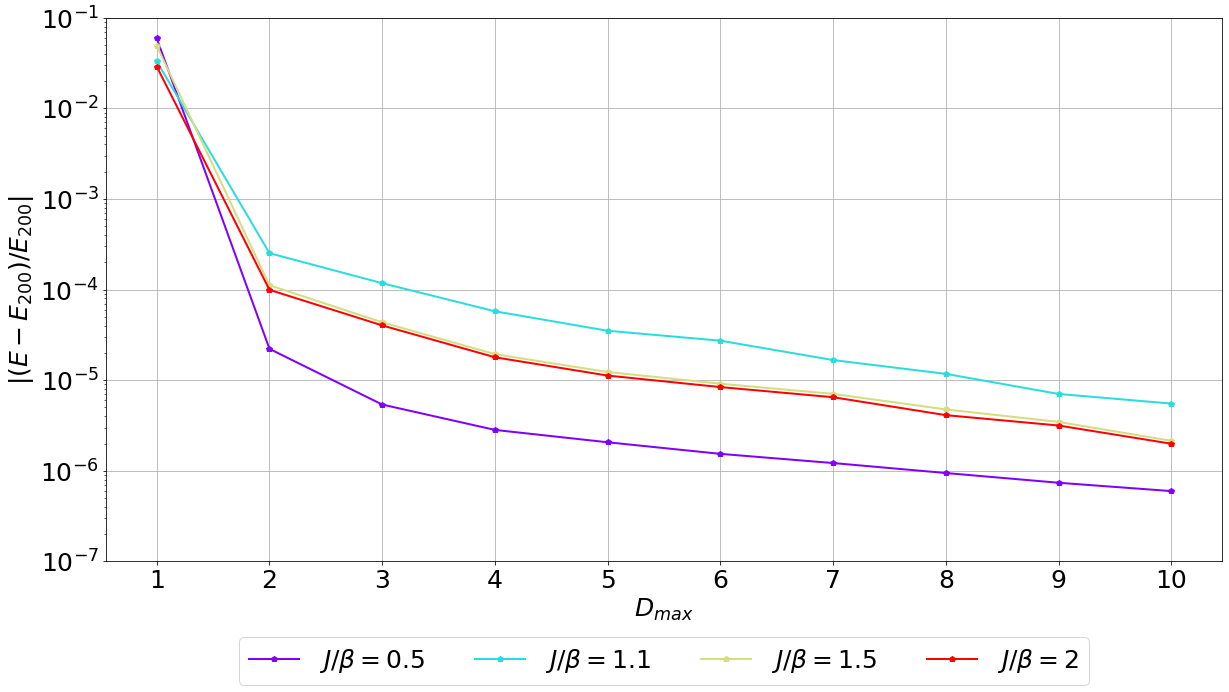

In [4]:
#'''|E-E_200|/|E_200| vs. D_max - N=100'''

fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$D_{max}$")
ax.set_ylabel(r"$|(E-E_{200})/E_{200}|$")
plt.yscale('log')
plt.xticks(np.arange(0, 11, step=1))  # Set label locations.
plt.ylim(0.0000001, 0.1)

J = [0.5, 1.1, 1.5, 2]
xvec = []
yvec = []

for i in range(len(J)):
    fn = "../Data/gs_calc/E_vs_Dmax_N=100_Jbeta=" + str(J[i]) + "_D=10.txt"
    x, y = mp_loadtxtfile(fn)
    E0 = np.full(len(x), ex_E_N_100[i])
    xvec.append(x)
    yvec.append((y-E0)/np.abs(E0))

color=iter(cm.rainbow(np.linspace(0,1,len(J))))
for i in range(len(J)):
    col=next(color)
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$J/\beta=$"+str(J[i]), color=col, linewidth=2)
    
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=4)

#mp_savePDF("./results/relE_vs_Dmax_N=100", fig)

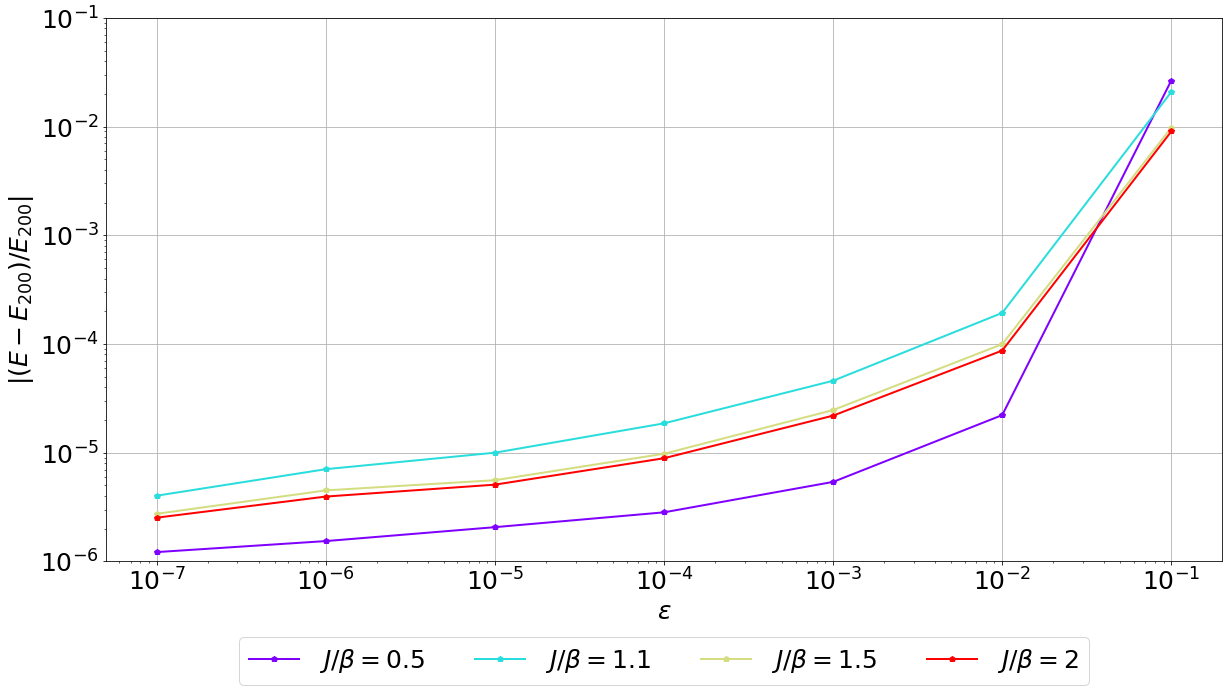

In [5]:
#'''|E-E_200|/|E_200| vs. epsilon - N=100'''

fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$|(E-E_{200})/E_{200}|$")
plt.yscale('log')
plt.xscale('log')
plt.yticks([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])  
plt.ylim(0.000001, 0.1)

J = [0.5, 1.1, 1.5, 2]
xvec = []
yvec = []

for i in range(len(J)):
    fn = "../Data/gs_calc/E_vs_eps_N=100_Jbeta=" + str(J[i]) + "_D=10.txt"
    x, y = mp_loadtxtfile(fn)
    E0 = np.full(len(x), ex_E_N_100[i])
    xvec.append(x)
    yvec.append((y-E0)/np.abs(E0))

color=iter(cm.rainbow(np.linspace(0,1,len(J))))
for i in range(len(J)):
    col=next(color)
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$J/\beta=$"+str(J[i]), color=col, linewidth=2)
    
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=4)

#mp_savePDF("./results/relE_vs_eps_N=100", fig)

### Runtime Improvement through Truncation
The analysis was performed using the **Python**-Scripts _MPS_Program_runtime_gs_without_trunc.py_ and _MPS_Program_runtime_gs_with_trunc.py_.

The runtime $t$ was examined with and without performing truncation, for different couplings $J/\beta \in \lbrace 0.5, 1.1, 2\rbrace$, depending on the particle number $N$.

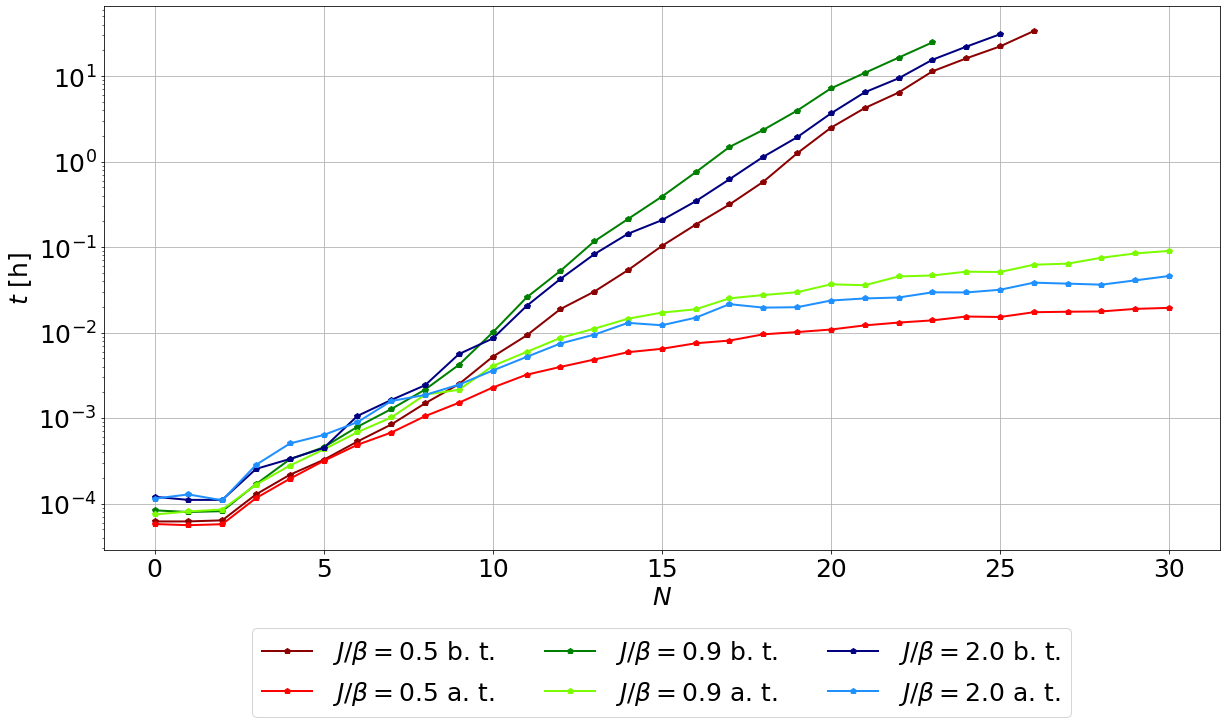

In [6]:
#''' Runtime analysis with and without truncation during ground state calculation'''
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel("$t$ [h]")
ax.set_xlabel(r"$N$")
plt.yscale('log')
 
x = [0.,0.,0.,0.,0.,0.]
y = [0.,0.,0.,0.,0.,0.]

x[0],y[0] = mp_loadtxtfile('../Data/gs_calc/runtime_without_trunc_Jbeta=0.5.txt')
x[2],y[2] = mp_loadtxtfile('../Data/gs_calc/runtime_without_trunc_Jbeta=0.9.txt')
x[4],y[4] = mp_loadtxtfile('../Data/gs_calc/runtime_without_trunc_Jbeta=2.txt')

x[1],y[1] = mp_loadtxtfile('../Data/gs_calc/runtime_with_trunc_Jbeta=0.5.txt')
x[3],y[3] = mp_loadtxtfile('../Data/gs_calc/runtime_with_trunc_Jbeta=0.9.txt')
x[5],y[5] = mp_loadtxtfile('../Data/gs_calc/runtime_with_trunc_Jbeta=2.txt')

lab = 'p-'
for i in range(6):
    if(i==0):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=0.5$ b. t.', color='darkred', linewidth=2)
    elif(i==1):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=0.5$ a. t.', color='red', linewidth=2)
    elif(i==2):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=0.9$ b. t.', color='green', linewidth=2)
    elif(i==3):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=0.9$ a. t.', color='lawngreen', linewidth=2)
    if(i==4):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=2.0$ b. t.', color='navy', linewidth=2)
    elif(i==5):
        ax.plot(x[i], y[i]/60/60, lab, label=r'$J/\beta=2.0$ a. t.', color='dodgerblue', linewidth=2)
            
plt.legend(bbox_to_anchor=[0.5, -0.33], loc='lower center', ncol=3)

#mp_savePDF("./results/runtime_vs_particle_number", fig)

b.t. = before truncation, a.t. = after truncation

## Part 2: Step Size Adaptation

For larger and higher dimensional systems, the convergence has to be tuned in order to achieve the smallest total error and minimize the number of iteration steps needed to reach the ground state. This can be achieved, by varying the size of the time steps $\delta t$, starting first with a coarse-grained step size and reducing it successively once the exponential error yields no longer significant contributions. Then, the idea is to perform only a small number of steps using the smaller step size in order to increase the algorithm's efficiency and reduce the Trotter error.

The approximated ground state energy $E_0$ is computed by extrapolating the Trotter error, which grows as $(\delta t)^{r+1}$, as
\begin{align}
E(\delta t; E_0, \alpha, r) = E_0 + \alpha \cdot \delta t^{r+2} + \mathcal{O}(\delta t^{r+3})
\end{align}
for some constant parameter $\alpha$, where $E$ depicts the energy calculated in one iteration step depending on the step size $\delta t$. Hence, the ground state energy $E_0$ can be obtained from two different step sizes $\delta t_1$ and $\delta t_2$ as
\begin{align}
E_0 = \bigg(\dfrac{1}{\delta t_1^{r+2}} - \dfrac{1}{\delta t_2^{r+2}}^{-1} \bigg) \bigg(\dfrac{E(\delta t_1)}{\delta t_1^{r+2}} - \dfrac{E(\delta t_2)}{\delta t_2^{r+2}} \bigg) + \mathcal{O}(\delta t^{r+3})
\end{align}
up to an error scaling in $\delta t$ scaling as $\mathcal{O}(\delta t^{r+3})$.

The ground state energy $E_0$ is calculated every time the step size $\delta t$ is reduced, s.t. it increases in precision as the error decreases polynomially for smaller step sizes.

In the following, the calculated ground state energy depending on the step size $\delta t$ is illustrated for a system of $N=50$ particles with $J/\beta = 0.9$.
A function of the form
\begin{align}
E(\delta t; E_0, \alpha, r) = E_0 + \alpha \cdot \delta t^{r+2} + \mathcal{O}(\delta t^{r+3})
\end{align}
is fitted, with fit parameters $E_0$, $\alpha$ and $r$, where $E_0$ depicts the exact ground state energy. The errors were estimated based on fluctuations observed in the ground state energy calculation to $\delta E = \pm0.005$.

Fit parameter: 
  0:   -66.8508 +-     0.0011
  1:    14.9216 +-     0.1477
Chisq / d.o.f:
   17.3961 /    17


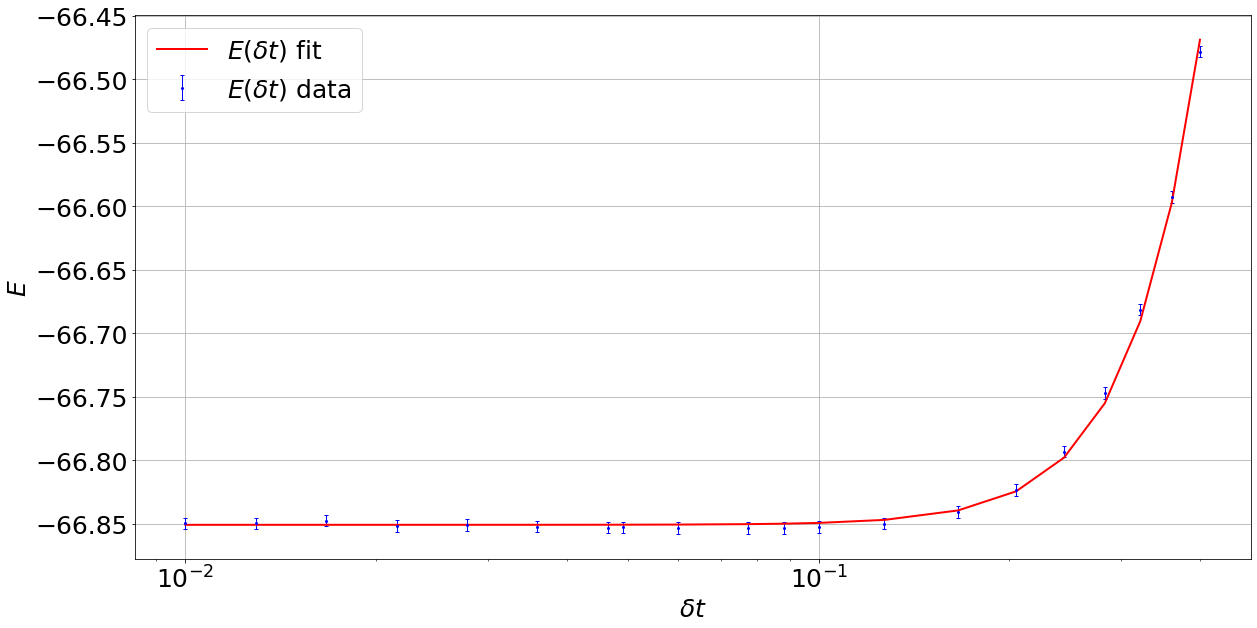

In [7]:
#fit of E(delta_t)

fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r'$\delta t$')
ax.set_ylabel(r'$E$')
plt.xscale('log')

#sorted data
x,y = mp_loadtxtfile('../Data/gs_calc/E_vs_dt0.txt')
iid = np.argsort(x)
x = x[iid]
y = y[iid]

#y errors 
dy = np.linspace(4.5e-3, 4.5e-3, len(x))

#fit
def f(x, *par):
    return(par[0] + par[1]*pow(x, 2+2))

popt = [-66.85, 15]
popt, pcov = mp_curveFit(x, y, dy, f, popt)
mp_chisq(x, y, dy, f, popt)

#plot result
mp_errorbar(ax, x, y, dy, lab=r'$E(\delta t)$ data')
ax.plot(x, f(x, *popt), '-', label=r'$E(\delta t)$ fit', color='red', linewidth=2)
plt.legend()

#mp_savePDF("./results/E_vs_delta_t_with_fit", fig)

One can approximate the exponential error by the following expression:
\begin{align}
\epsilon = \dfrac{|\Delta E (t)|}{|\Delta_{ex}|}(\delta t)^{-(r+2)} \quad \text{where} \quad \Delta E (t) = \dfrac{E(t+\delta t) - E(t)}{E(t)}
\end{align}
where $\Delta E $ depict the relative change of the energy in the current iteration step and $\Delta_{ex}$ the gap between the ground state and the first excited state.
The exponential error can be then compared to a target precision $\epsilon_{tol}$, which sets the threshold. When the exponential error is smaller than this threshold, the time step is changed by a factor of $\xi \in \lbrack 0.7,0.9 \rbrack$.

Since now a step size dependence is introduced, the convergence criterion has to be changed correspondingly, considering the $\delta t$-dependence. Hence, the algorithm is converged, once the Trotter error is small enough, i.e. once the step size $\delta t$ is smaller than a given precision $\epsilon_{\text{dt}}$.
The analysis was performed using the **Python**-Scripts _MPS_Program_E_vs_dt0.py_.

### Part 3: Ground State Calculation using Step Size Adaptation

The ground state of an MPS with $N=50$, $J/\beta = 1.1$ is calculated using the automatic step size adaption, starting with a step size of $\delta t_0 = 0.4$ decreasing it until the threshold $\epsilon_{\text{dt}}=0.09$ is reached. The parameters $\xi= 0.75$, $\epsilon_{tol}=0.01$ and the physical gap $\Delta_{ex} = 0.1$ are experimentally chosen, where $\Delta_{ex} = 0.1$ becomes significantly smaller for parameter values close to the thermodynamical limit, i.e. for large $N$ and $J/\beta \approx 1$.

In every iteration step, the arithmetic mean of the MPS's bond dimension after truncation as calculated, as well as the relative error between two energy expectation values in two consecutive iteration steps $\Delta E$, the exponential error as described above and the slope of the energy vs. iteration step. At every $\delta t$-reductions step, the approximate ground state energy $E_0$ is calculated from extrapolation of the Trotter error. All the varaibles of interest are written into the log file _run_groundstate_N{N}_J{J}_beta{beta}_{now}.txt_ where _now_ depicts a time stamp, that can be found in the folder _out_.

In [8]:
#calculate groundstate for N particles with step size adaption
N = 50
J = 1.1
beta = 1

dt0 = 0.4
eps_dt = 0.09
dt_red = 0.75
eps_tol = 0.01
phys_gap = 0.1
eps_trunc = 1e-4
Dmax = 10
bdim_start = 2

now = datetime.now().strftime("%y%m%d%H%M%S")
conf = ImagiTime_config(N=N, J=J, beta=beta, dt0=dt0, eps_trunc=eps_trunc, 
                        Dmax=Dmax, eps_dt=eps_dt, dt_red=dt_red, 
                        eps_tol=eps_tol, phys_gap=phys_gap, bdim_start=bdim_start)
E0, E, groundstate = getGroundstate(conf, now)

Iteration steps: 98
Energy ground state:  -66.5715950176
Extrapolated ground state energy: -66.573436



In [9]:
#data files
data_file = f"./out/run_groundstate_N{N}_J{J}_beta{beta}_{now}.txt"
#file in which the selected results can be stored in the folder data
store_file = f"./out/data/energy_vs_t_N{N}_J{J}_beta{beta}.txt"

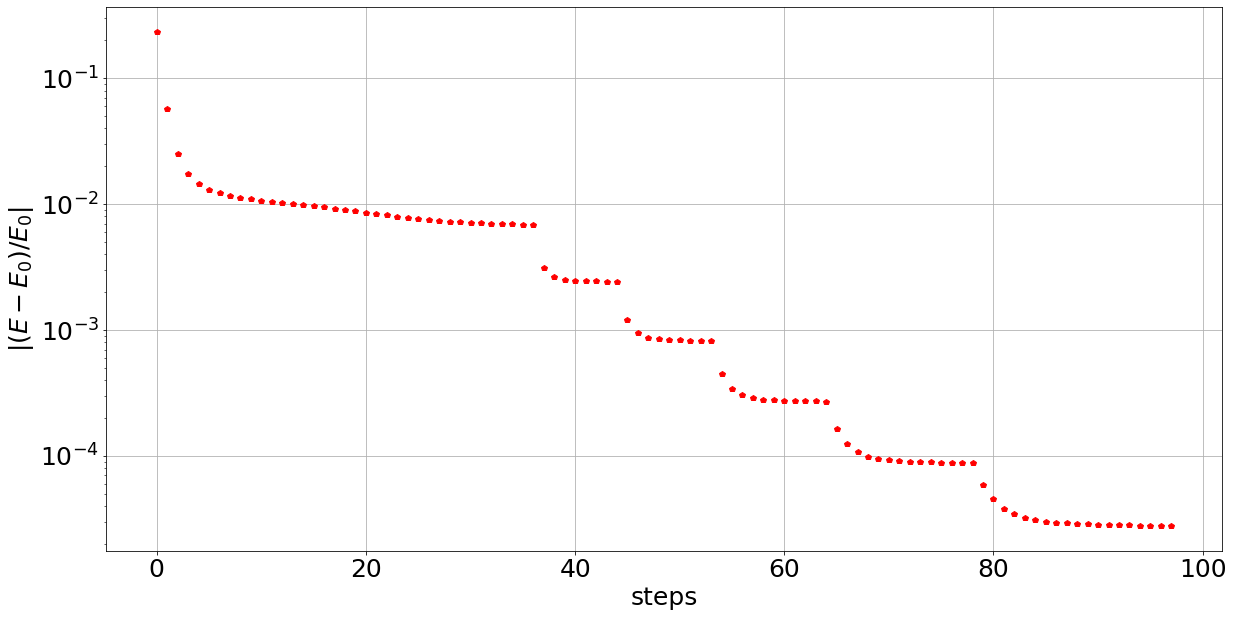

In [10]:
#|(E-E0)/E0| vs. (steps) t
fig, ax = mp_canvas(10, 2/1)
plt.yscale('log')
ax.set_ylabel(r'$|(E-E_0)/E_0|$')

#extract correct data from data file
x, y = extract_params_from_file(data_file, store_file, "[itstep]", [3,4])
y = np.abs((y-E0)/E0)

#plot data depending on t
# ax.set_xlabel("t")
# ax.plot(np.cumsum(x), np.abs(y), 'p', label=r'$|(E-E_0)/E_0|$', 
#         color='red', linewidth=2)

#plot data depending on steps
ax.set_xlabel("steps")
ax.plot(np.arange(0, len(y)), np.abs(y), 'p', label=r'$|(E-E_0)/E_0|$', 
        color='red', linewidth=2)

# mp_savePDF("./results/relE_vs_steps_variable_stepsize", fig)

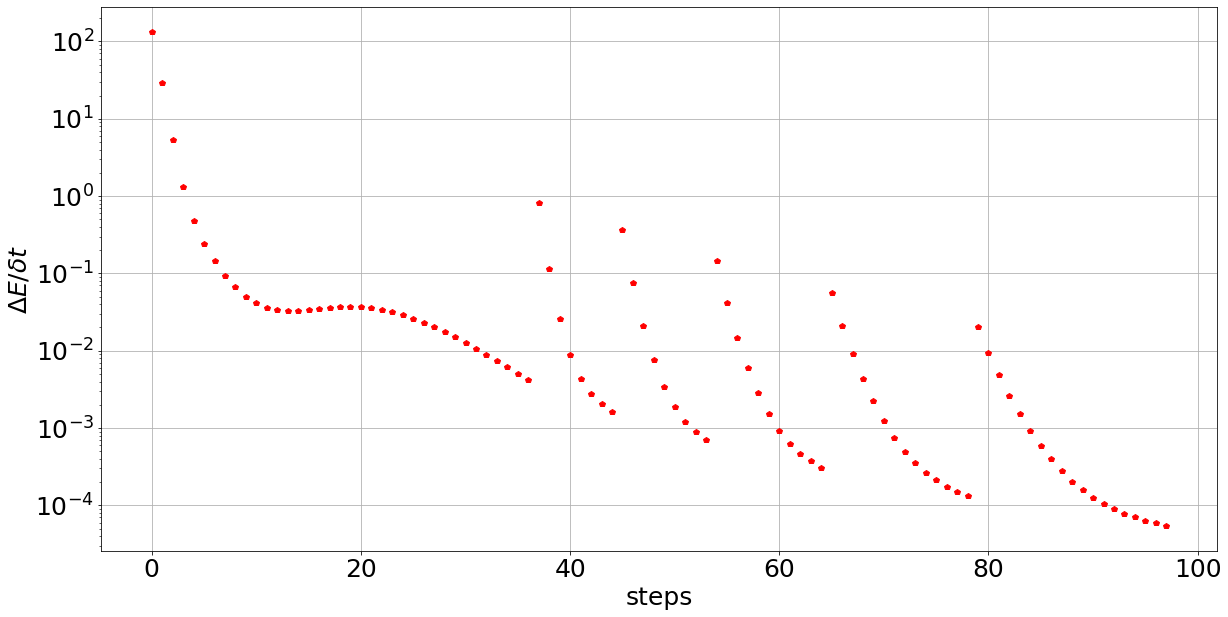

In [11]:
# Delta E (slope) vs. (steps) t 

fig, ax = mp_canvas(10, 2/1)
plt.yscale('log')
ax.set_ylabel(r'$\Delta E / \delta t$')

# extract correct data from data file
x, y = extract_params_from_file(data_file, store_file, "[itstep]", [3,7])

#plot data depending on t
# ax.set_xlabel("t")
# ax.plot(np.cumsum(x), np.abs(y), 'p', label=r'$\Delta E / \delta t$', 
#         color='red', linewidth=2)

#plot data depending on steps
ax.set_xlabel("steps")
ax.plot(np.arange(0, len(y)), np.abs(y), 'p', label=r'$\Delta E / \delta t$', 
        color='red', linewidth=2)

#mp_savePDF("./results/slope_vs_steps_variable_stepsize", fig)

### Part 5: Analysis Ground State Calculation for $N=2$ and $N=3$

To evaluate the outcome of the imaginary time evolution, the overlap between the computed ground state and the expected one from diagonalization of the trotterized Hamiltonian is computed. By determining the coefficients of each expected eigenstate, which form a $2^N$-dimensional basis in the Hilbert space, one can illustrate the principle of the imaginary-time evolution, i.e. the eigenstates corresponding to higher energies (or with higher eigenvalues) should be exponentially damped.

The eigenstate basis has the form
\begin{align}
|\Psi\rangle &= \sum_{i=0}^{2^N-1} \langle \Phi_i | \Psi \rangle |\Phi_i\rangle = \sum_{i=0}^{2^N-1} \alpha_i |\Phi_i\rangle
\end{align}
where $|\Phi_i\rangle$ depict the eigenstates with respect to the Hamiltonian $H$ and $\alpha_i = \langle \Phi_i | \Psi \rangle $ the coefficients of this basis with the property that $\sum_{i=0}^{2^N-1} |\alpha_i|^2 = 1$.

For $N=2$ we find a basis decomposition of the following form
\begin{align}
|\Psi\rangle &= \sum_{i=0}^{3} \alpha_i |\Phi_i\rangle\\
            &= \alpha_0 \cdot |\Phi_0\rangle + \alpha_1 \cdot |\Phi_1\rangle + \alpha_2 \cdot |\Phi_2\rangle + \alpha_3 \cdot |\Phi_3\rangle 
\end{align}
with $|\alpha_0|^2 + |\alpha_1|^2 + |\alpha_2|^2 + |\alpha_3|^2  = 1$. The original ground state calculation is therefore slightly varied, since in every iteration step the coefficients have to calculated. Hence, this analysis can only be performed for small particle numbers. The coefficients are stored in the data files _ampltiude{i}.txt_, where $i\in\lbrace0,\dotsc,2^N-1\rbrace$, and the corresponding energy expectation value per iteration step in _energy_vs_it_step.txt_.

In [12]:
#calculate coeffcients groundstate in eigenbasis:
def calc_coeff_in_eigenbasis(N, J, beta, groundstate, dt):
    #diagonalize H
    #exact:
    # eigenvals, eigenvecs = getEigenstate(N, J, beta)
    #trotterized with order ST:
    evals, evecs = get_trotterized_H(N, J, beta, dt, ST=2)
    
    #sort eigenvalues and corresponding eigenvectors in ascending order
    iid = evals.argsort()[::] 
    evals = evals[iid]
    evecs = evecs[:,iid]

    #calculate coeffcients of state 
    coeff = calc_coeff_state(groundstate)

    #coeffcients in eigen basis
    amplitudes = []
    for i in range(pow(2,N)):
        amplitudes.append(np.abs(np.matmul(np.conj(evecs[:,i]), coeff)))

    return(amplitudes)

#perform imaginary time evolution and evaluate result wrt to 
#expected ground state from exact diagonalization:
def perform_TEBD(N, bonddim, dt, J, beta, printState=True):
    groundstate = getGroundstateMPSEval(bonddim, J, beta, dt, 1e7, True, 1e-8)

    #calculate coeffcients in eigen-basis
    amp = calc_coeff_in_eigenbasis(len(bonddim), J, beta, groundstate, dt)
    s = 0
    print("\ncoefficients in eigen-basis (corresponding energy in ascending order):")
    for i in range(len(amp)):
        print("a_" + str(i) + " = ", amp[i].item())
        s = s + amp[i]*amp[i]
    print("\n")
    #print("\nSquared sum of amplitudes: ", s.item(), "\n")

    #Eigenstates and Eigenvalues (trotterized):
    evals, evecs = get_trotterized_H(N, J, beta, dt, ST=2)
    exp_E = np.min(evals.numpy())
    hamiltonian = genH(len(groundstate), J, beta)
    print("Expected ground state energy after ST 2: ", exp_E)
    print("\nEnergy deviation from expected trotterized energy: ", np.abs(getEnergyExpVal(groundstate, hamiltonian).item()-exp_E))

    if (printState):
        print("\ncoefficients after time evolution:")
        print("------------------------------------")
        print(calc_coeff_state(groundstate).numpy())
        print("------------------s------------------")
        
        printEigenstate(len(bonddim), J, beta, False, dt, ST=2)
        printEigenstate(len(bonddim), J, beta)
        
#plots coeffcients of eigenbasis vs iteration step 
#and the resulting energy vs. the iteration step, 
#which is stored in 'energy_vs_iteration step.txt'
def plot_mps_data(N, file, plot_amps=False, plot_E=False, plot_all=True, save_fig=False):
    #create canvas
    fig, ax = mp_canvas(10, 2/1)
    
    if(plot_E or plot_all):
        plt.yscale('log')
        ax.set_xlabel("$t$")
        ax.set_ylabel(r'$|(E-E_0)/E_0|$')
        #load data for energy per iteration step
        x,y = mp_loadtxtfile('energy_vs_iteration step.txt')
        ax.plot(x, y, '-', label=r'$|(E-E_{trott})/E_{trott}|$', color='red', linewidth=2)
    
    if(plot_amps or plot_all):
        plt.yscale('log')
        plt.yticks([0.0000000000000001, 0.00000000000001, 0.000000000001, 0.0000000001, 0.00000001, 0.000001, 0.0001, 0.01, 1]) 
        color=iter(cm.rainbow(np.linspace(0,1,pow(2,N))))
        ax.set_xlabel("$t$")
        ax.set_ylabel(r"$|\langle \Phi_i|\Psi \rangle|$")
        #load data of amplitudes per iteration step
        xvals = []
        yvals = []
        for i in range(pow(2,N)):
            xv, yv = mp_loadtxtfile('amplitude' + str(i) + '.txt')
            xvals.append(xv)
            yvals.append(yv)
        for i in range(pow(2,N)):
            col=next(color)
            ax.plot(xvals[i], yvals[i], '-', label=r"$\Phi_i = \Phi_" + str(i) + "$", 
                    color=col, linewidth=2)
        if(N==2): 
            plt.legend(bbox_to_anchor=[0.5, -0.23], loc='lower center', ncol=4)
        else:
            plt.legend(bbox_to_anchor=[0.5, -0.33], loc='lower center', ncol=4)
    if(save_fig):
        mp_savePDF(file, fig)

In [13]:
#plot amplitudes (par = 0) or energy (par = 1) per time step 
#and save plots as pdf when save_fig = True
def plot_data(par, N, bdims, dt, J, beta, save_fig):
    print("\nParticle Number = ", N)
    if(par == 0):
        file = f"amps_N={N:d}_dt={dt:f}_J={J:f}_beta={beta:f}"
        plot_mps_data(N, file, True, False, False, save_fig)  
    elif(par == 1):
        file = f"energy_N={N:d}_dt={dt:f}_J={J:f}_beta={beta:f}"
        plot_mps_data(N, file, False, True, False, save_fig)

#### Results for $N=2$

For $N=2$ we examine first the cases, in which the given Hamiltonian reduces to one of its terms $H_0$ or $H_1$ respectively, by setting the parameter $\beta = 0$, i.a. $J=0$, correspondingly. From diagonalization of the trotterized Hamiltonian, the resulting ground and excited states, as well as their energies, are determined.

#### Ground state for $J \neq 0$ , $\beta = 0$

For $J \neq 0 $ and $\beta = 0$ we find, that both the ground state as well as the first excited state are degenrated, with energies $E_0$ and $E_1$ correspondingly:
    \begin{align}
    E_0 = -J:\quad |\Psi\rangle \in \Bigg\{
    \begin{pmatrix}
    0 \\
    -\frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}}\\
    0
    \end{pmatrix}, 
    \begin{pmatrix}
    \frac{1}{\sqrt{2}} \\
    0\\
    0\\
    -\frac{1}{\sqrt{2}}
    \end{pmatrix}
    \Bigg\}, 
    \quad
    E_1 = J: \quad |\Psi\rangle \in \Bigg\{ 
    \begin{pmatrix}
    0 \\
    \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{2}}\\
    0
    \end{pmatrix}, 
    \begin{pmatrix}
    \frac{1}{\sqrt{2}} \\
    0\\
    0\\
    \frac{1}{\sqrt{2}}
    \end{pmatrix}
    \Bigg\} 
    \end{align}
    
#### Ground state for $J = 0$ , $\beta \neq 0$

For $J = 0 $ and $\beta \neq 0$ we find, that only the first excited state is two-fold degenerated:
    \begin{align}
    E_0 = -2\beta:\quad |\Psi\rangle =
    \begin{pmatrix}
    0 \\
    0\\
    0\\
    1
    \end{pmatrix}, 
    \quad
    E_1 = 0: \quad |\Psi\rangle \in \Bigg\{ 
    \begin{pmatrix}
    0 \\
    1 \\
    0 \\
    0
    \end{pmatrix}, 
    \begin{pmatrix}
    0\\
    0\\
    1\\
    0\\
    \end{pmatrix}
    \Bigg\}, \quad
     E_2 = 2\beta:\quad |\Psi\rangle =
    \begin{pmatrix}
    1 \\
    0\\
    0\\
    0
    \end{pmatrix}, 
    \end{align}

In [14]:
#ground state analysis:
N = 2
J = 1
beta = 1
delta_t = 0.011
bdims = 3

bonddims = gen_bonddims(N, bdims)
perform_TEBD(len(bonddims), bonddims, delta_t, J, beta, printState = False)

#save figures:
save_fig = False
#---------------------------------


Iteration steps:  415

Energy ground state:  -2.2360671864469968

coefficients in eigen-basis (corresponding energy in ascending order):
a_0 =  0.9999996810717062
a_1 =  0.0007986591760146474
a_2 =  8.582268090121345e-08
a_3 =  2.2262953466820372e-10


Expected ground state energy after ST 2:  -2.236104050983869

Energy deviation from expected trotterized energy:  3.686453687246072e-05



Particle Number =  2


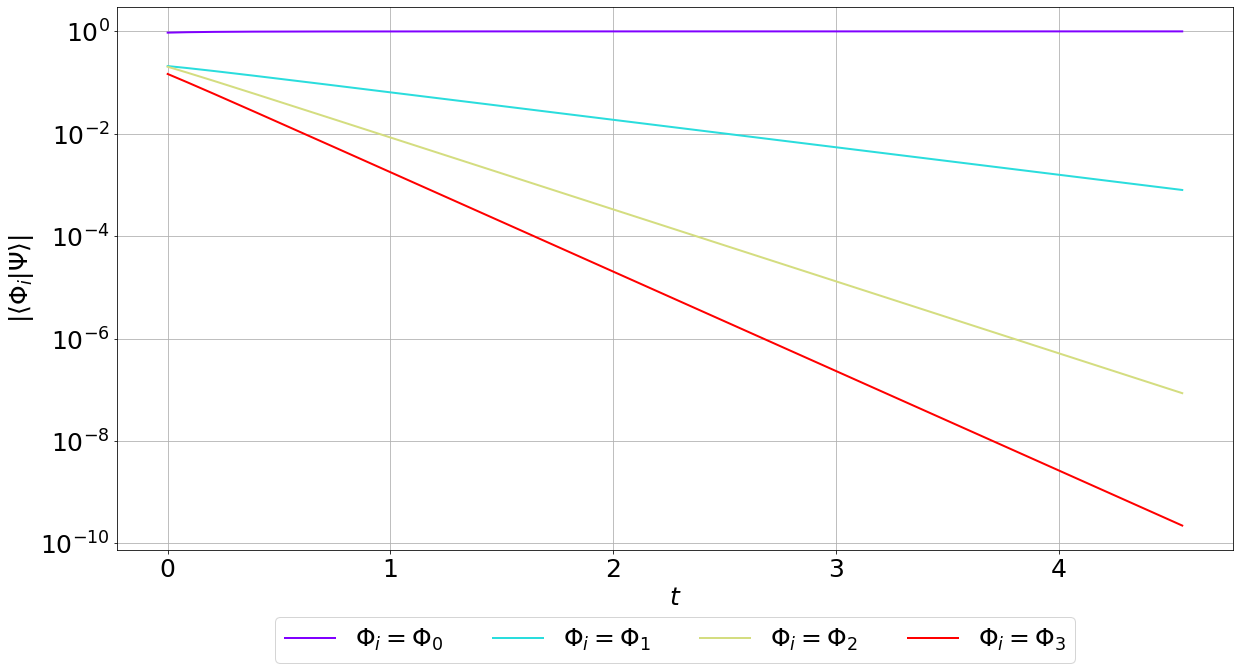

In [15]:
#--------Plotting amplitudes---------
plot_data(0, N, bdims, delta_t, J, beta, save_fig)


Particle Number =  2


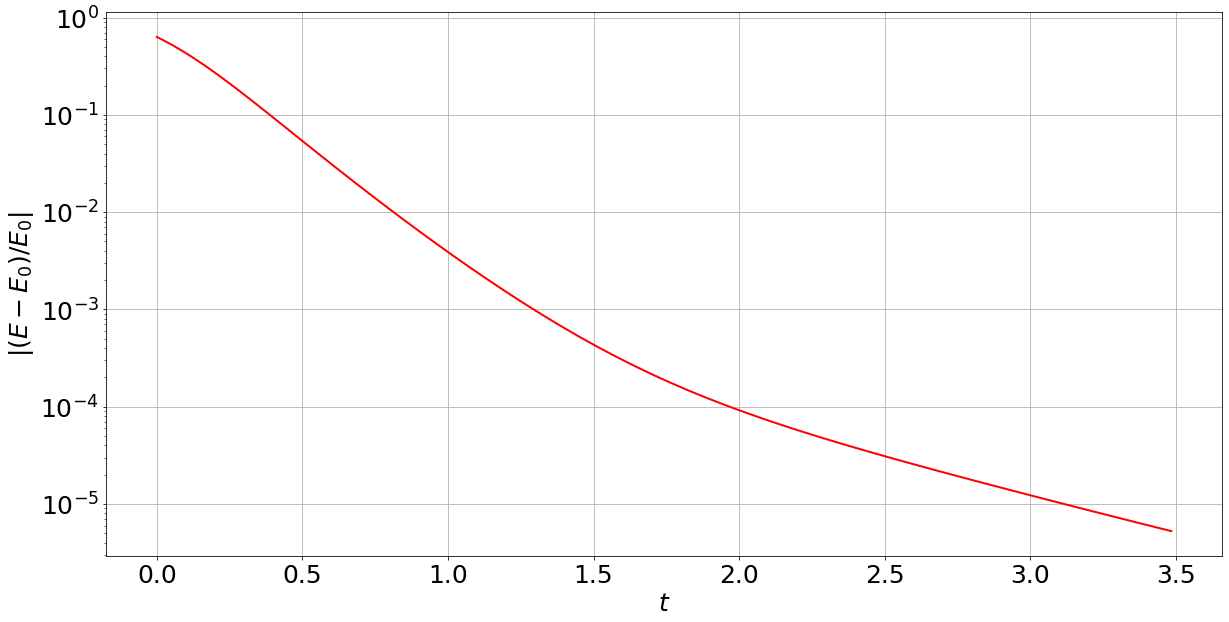

In [16]:
#--------Plotting energy deviation from trotterized energy---------
plot_data(1, N, bdims, delta_t, J, beta, save_fig)

#### Results for $N=3$

In [17]:
#Groundstate for J != 0, beta != 0:
#-------------------------------------------
N = 3
J = 1
beta = 1
delta_t = 0.0011
bdims = 3

bonddims = gen_bonddims(N, bdims)
perform_TEBD(len(bonddims), bonddims, delta_t, J, beta, False)

#save figures:
save_fig = True
#-------------------------------------------


Iteration steps:  5074

Energy ground state:  -3.4939414360079133

coefficients in eigen-basis (corresponding energy in ascending order):
a_0 =  0.9999900169443712
a_1 =  0.004468334034644133
a_2 =  1.5967827215655832e-06
a_3 =  1.0884790832728404e-08
a_4 =  1.5255727059967132e-09
a_5 =  8.123859950341754e-12
a_6 =  3.733823451952752e-14
a_7 =  5.720787071148634e-16


Expected ground state energy after ST 2:  -3.49395991013634

Energy deviation from expected trotterized energy:  1.847412842659324e-05



Particle Number =  3


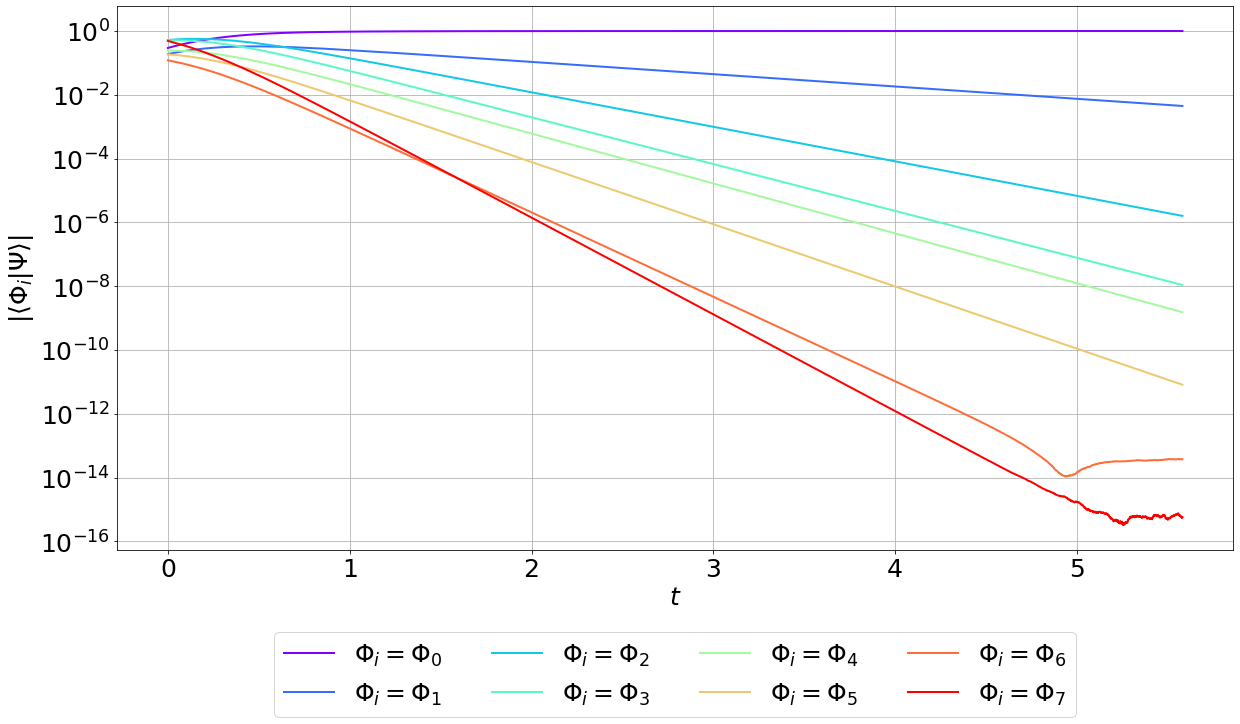

In [18]:
#--------Plotting amplitudes---------
plot_data(0, N, bdims, delta_t, J, beta, save_fig)


Particle Number =  3


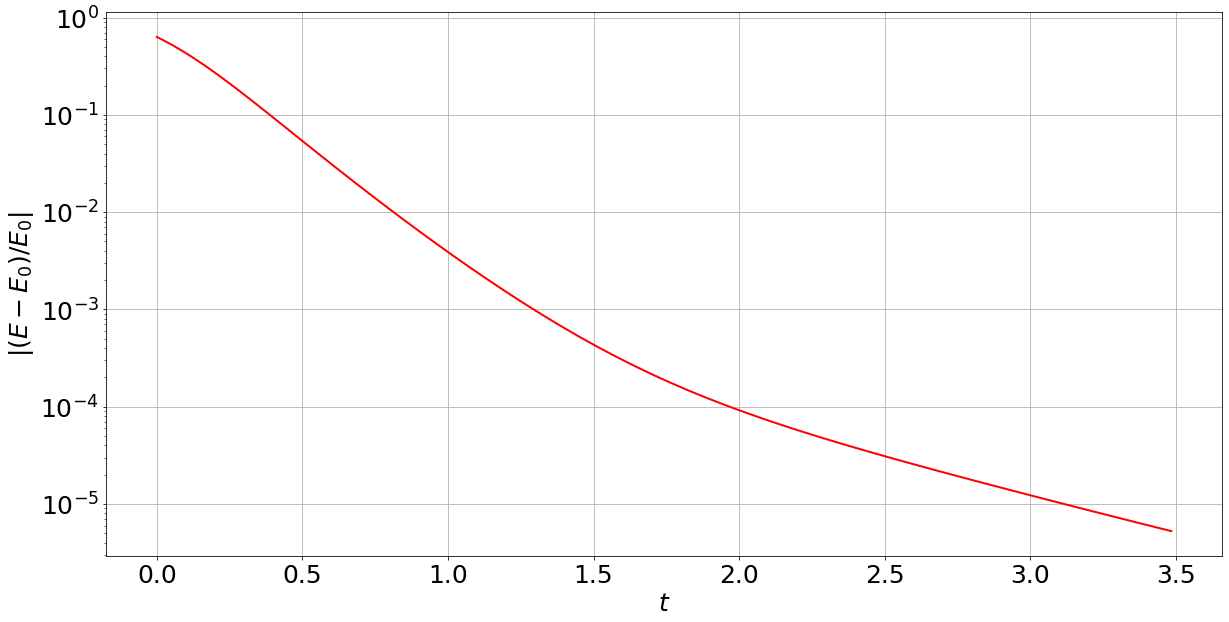

In [19]:
#--------Plotting energy deviation from trotterized energy---------
plot_data(1, N, bdims, delta_t, J, beta, save_fig)

### Part 6: Energy per lattice site $E/N$ depending on $J/\beta$

The analysis was performed using the **Python**-Script _MPS_Program_calc_gs_energy.py_.

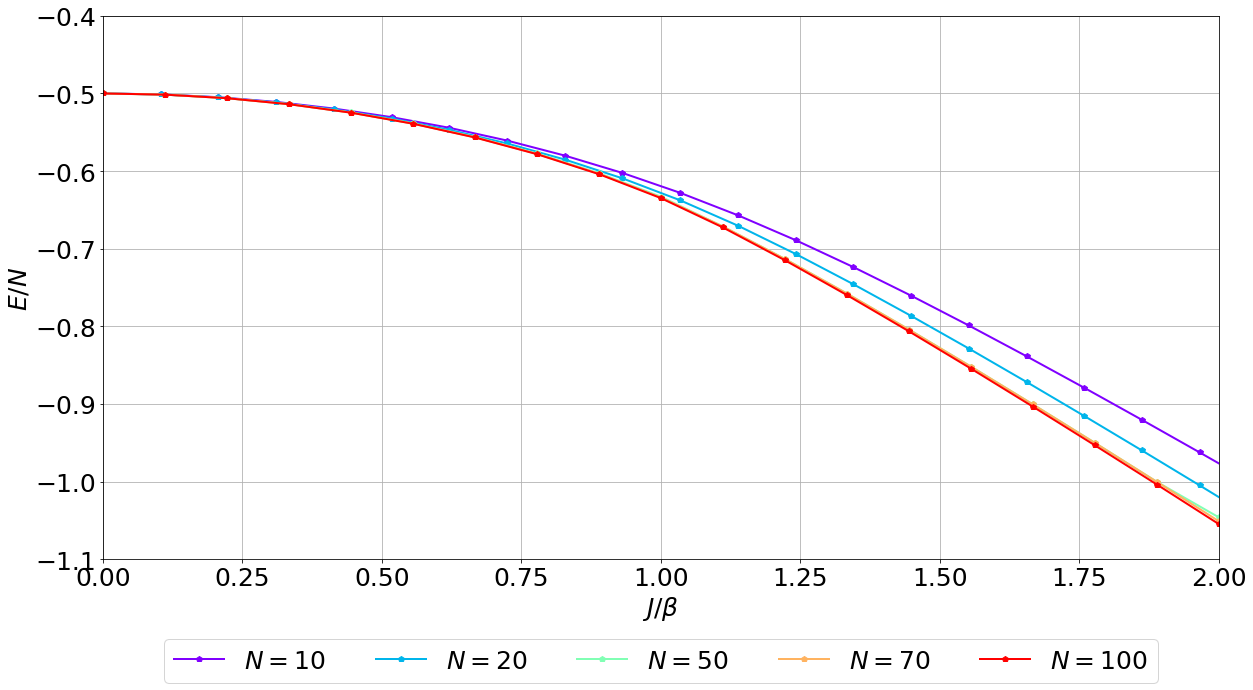

In [20]:
# E/N vs. J/beta
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$J/\beta$")
ax.set_ylabel(r"$E/N$")
plt.xlim(0,2)
plt.ylim(-1.1, -0.4)
plt.yticks(np.arange(-1.1, -0.3, step=0.1))  # Set label locations.

Nns = [10, 20, 50, 70, 100]
nplots = len(Nns)
xvec = []
yvec = []

for i in range(nplots):
    fn = "../Data/gs_calc/E_over_N_N=" + str(Nns[i]) +".txt"
    x, y = mp_loadtxtfile(fn) 
    xvec.append(x)
    yvec.append(y)

color=iter(cm.rainbow(np.linspace(0,1,len(Nns))))
for i in range(len(xvec)):
    col=next(color)
    ax.plot(xvec[i], (yvec[i])*0.5, 'p-', label=r"$N=$"+str(Nns[i]), 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=5)

#mp_savePDF("./results/E_over_N", fig)

### Ground State from Exact Numerical Diagonalization of $H$

In order to check whether to correct ground state has been found or not, the eigenstates and corresponding eigenvalues of the Hamiltonian $H$ can be determined by exact diagonalization.

Therefor, the Hamiltonian can be rewritten as a $(2^N \times 2^N)$-matrix $H$ by considering the product space of all $N$-particles
\begin{align}
H &= J \cdot \sum_{i=0}^{N-2} \sigma^x_i \otimes \sigma^x_{i+1} + \beta \cdot \sum_{i=0}^{N-1} \sigma^z_i  \equiv H_0 + H_1\\
  &= J \cdot (\sigma^x_0 \otimes \sigma^x_1 \otimes \mathbb{1}_2 \otimes \dotsc \otimes \mathbb{1}_{N-1} + \mathbb{1}_0 \otimes \sigma^x_1 \otimes \sigma^x_2 \otimes \mathbb{1}_3 \otimes \dotsc \otimes \mathbb{1}_{N-1} + \dotsc + \mathbb{1}_0 \otimes \dotsc \otimes \sigma^x_{N-2} \otimes \sigma^x_{N-1}) \\
  & + \beta \cdot  (\sigma^z_0 \otimes \mathbb{1}_1 \otimes \mathbb{1}_2 \otimes \dotsc \otimes \mathbb{1}_{N-1} + \mathbb{1}_0 \otimes \sigma^z_1 \otimes \mathbb{1}_2 \otimes \mathbb{1}_3 \otimes \dotsc \otimes \mathbb{1}_{N-1} + \dotsc + \mathbb{1}_0 \otimes \dotsc \otimes \mathbb{1}_{N-2} \otimes \sigma^z_{N-1})
\end{align}

_Example for $N=2$:_
\begin{align}
H &= J \cdot (\sigma^x_0 \otimes \sigma^x_1) + \beta \cdot (\sigma^z_0 \otimes \mathbb{1}_1 + \mathbb{1}_0 \otimes \sigma^z_1 ) \\
  &= J \cdot      
  \begin{pmatrix}
     0 & 0 & 0 & 1\\
     0 & 0 & 1 & 0 \\
     0 & 1 & 0 & 0 \\
     1& 0 & 0 & 0
   \end{pmatrix}
   + \beta \cdot \Bigg[
   \begin{pmatrix}
     1 & 0 & 0 & 0\\
     0 & -1 & 0 & 0 \\
     0 & 0 & 1 & 0 \\
     0& 0 & 0 & -1
   \end{pmatrix} +
   \begin{pmatrix}
     1 & 0 & 0 & 0\\
     0 & 1 & 0 & 0 \\
     0 & 0 & -1 & 0 \\
     0& 0 & 0 & -1
   \end{pmatrix} \Bigg] =
   \begin{pmatrix}
     2\beta & 0 & 0 & J\\
     0 & 0 & J & 0 \\
     0 & J & 0 & 0 \\
     J & 0 & 0 & -2\beta
   \end{pmatrix}
\end{align}

In [21]:
'''exact diagonalization of Hamiltonian'''
#-----------------------------------------------------------------------
from scipy.sparse.linalg import lobpcg  

#count number of bits q=1 in x with N bits
def count_ones(x, N):
    count = 0
    for i in range(N):
        #increase by 1, if q_i=1
        count += x//2**i % 2
    return(count)

#determine matrix form of Hamiltonian part H_0
def get_h0_matrix(J, N):
    h0 = np.zeros((2**N, 2**N), complex)
    idx = np.arange(2**N)
    for k in range(N-1):
        #bit-flip of bits k and k+1
        idx_switched = ( idx ^ 2**k ) ^ 2**(k+1)
        h0[idx, idx_switched] = complex(1,0)
    return(h0*J)

#determine matrix form of Hamiltonian part H_1
def get_h1_matrix(beta, N):
    h1 = np.zeros((2**N, 2**N), complex)
    for i in range(2**N):
        factor = N - 2*count_ones(i,N)
        h1[i,i] = factor*beta
    return(h1)

#determine matrix form of Hamiltonian H = H_0 + H_1
def get_h_matrix(J, beta, N):
    return np.add(get_h0_matrix(J, N), get_h1_matrix(beta, N))

#calculate ground state from exact numerical diagonalization
def gs_from_exact_diag(N, J, beta):
    rng = np.random.default_rng()
    x = rng.random((2**N, 1))
    hamiltonian = get_h_matrix(J, beta, N)

    evals, evecs = lobpcg(hamiltonian, x, largest=False)
    gs = evecs[:,0]
    E0 = evals[0]

    del hamiltonian
    gc.collect()

    return E0, gs;

In [22]:
N = 2
J = 2
beta = 1
#calculate all eigenstates with function from library
printEigenstate(N, J, beta)

----------------Eigenstates----------------
Eigenvalue:  -2.82842712474619
to eigenstate:  [-0.38268343 -0.         -0.          0.92387953] 

Eigenvalue:  -2.0
to eigenstate:  [ 0.         -0.70710678  0.70710678  0.        ] 

Eigenvalue:  2.0
to eigenstate:  [-0.          0.70710678  0.70710678 -0.        ] 

Eigenvalue:  2.828427124746189
to eigenstate:  [ 0.92387953 -0.         -0.          0.38268343] 

